In [ ]:
## Problem Statement

A rental company aggregates rental providers and offers service to the customers to estimate/negotiate rental value for their potential listing.
Various property attributes for the current listings have been provided as past data.

Task is to predict the rental value for the target.

RESULTS:
    RandomForestRegressor with Cross Validation (CV=10) has best captured the essense, with RMSE = 9.14
    

NEXTSTEPS:
    
# Rework and refine apporach of distances from cite center
# check with log transform of data and the effect of same on the model improvement
# Check with one-hot encoding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier                                       
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split   
pd.set_option('display.max_columns',None)

from sklearn.linear_model import LinearRegression          
from sklearn import metrics                               


#ADDED all the required Libraries.


## Data Loading and Cleaning
#doublecheck the current directory
#change directory to 'data'

In [2]:
import os
print(os.getcwd())
os.chdir('./data')
print(os.getcwd())

C:\Users\BLR_01\Pictures\Geyitm\Hack
C:\Users\BLR_01\Pictures\Geyitm\Hack\data


# Read the data.

In [3]:
# Load the dataframe: both initial train and test 
df_train_initial = pd.read_csv('Train.csv',delimiter=',')
df_test_initial =pd.read_csv('Test.csv',delimiter=',')

#find the shapes of initial data
print('Shape of train_initial: ',df_train_initial.shape)
print('Shape of test_initial: ',df_test_initial.shape)


('Shape of train_initial: ', (34226, 16))
('Shape of test_initial: ', (14669, 15))


# head

In [4]:
# info on train data initial
df_train_initial.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [5]:
# info on test data
df_test_initial.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39
1,30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364
2,21354525,Cozy Brooklyn Heights Getaway w/ Manhattan Access,11743513,Henry,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108
3,35995074,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,4128829,Sara,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,NaN,2,365
4,34392081,Hello! This is a very cozy space in Williamsburg.,259630588,Alina,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,28,2019-06-26,14.00,2,20


In [6]:
# More views of training data in different ways 
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
id                                34226 non-null int64
name                              34214 non-null object
host_id                           34226 non-null int64
host_name                         34213 non-null object
neighbourhood_group               34226 non-null object
neighbourhood                     34226 non-null object
latitude                          34226 non-null float64
longitude                         34226 non-null float64
room_type                         34226 non-null object
price                             34226 non-null int64
minimum_nights                    34226 non-null int64
number_of_reviews                 34226 non-null int64
last_review                       27244 non-null object
reviews_per_month                 27244 non-null float64
calculated_host_listings_count    34226 non-null int64
availability_365                  34226 non-null int64

In [7]:
df_train_initial.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Observations about the data
#price avarage is about 243, goes till 10000 - suggesting some outliers?. Some are priced '0'; need to check why that could be.
#Same is true for calculated_host_listing_count
#STD deviationquite high for minimum_nights. 
#MAX value for minimum_nights is 1250; need to check. is it valid?
#availability_365 is zero for many


# Finding null values for training data

In [8]:
df_train_initial.isna().sum()


id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#Observations
#name and hostname has missing values but that is insignificant
#last_review and hence reviews_per_month has nulls. Either we can not consider it as feature or impute with zero
#for now we will impute with zero and retain the same..

In [9]:
# fill make review_per_month to '0'
df_train_initial['reviews_per_month'].fillna(0,inplace = True)

In [10]:
#test missing values
df_train_initial.isna().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#Further  could we will impute the last_review to the mean year, in case we want use this 
#Can be left as future excercise

# Do the similar steps to remove nulls from Test data

In [11]:
df_test_initial.isna().sum()

id                                   0
name                                 4
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       3070
reviews_per_month                 3070
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
# fill make review_per_month to '0'
df_test_initial['reviews_per_month'].fillna(0,inplace = True)


In [13]:
#end of remove nulls from test data

#First find the unique values of neighbourhood_group,neighbourhood, room_type for exploration

In [14]:
#first find the outliers in the price data and see how to handle this.

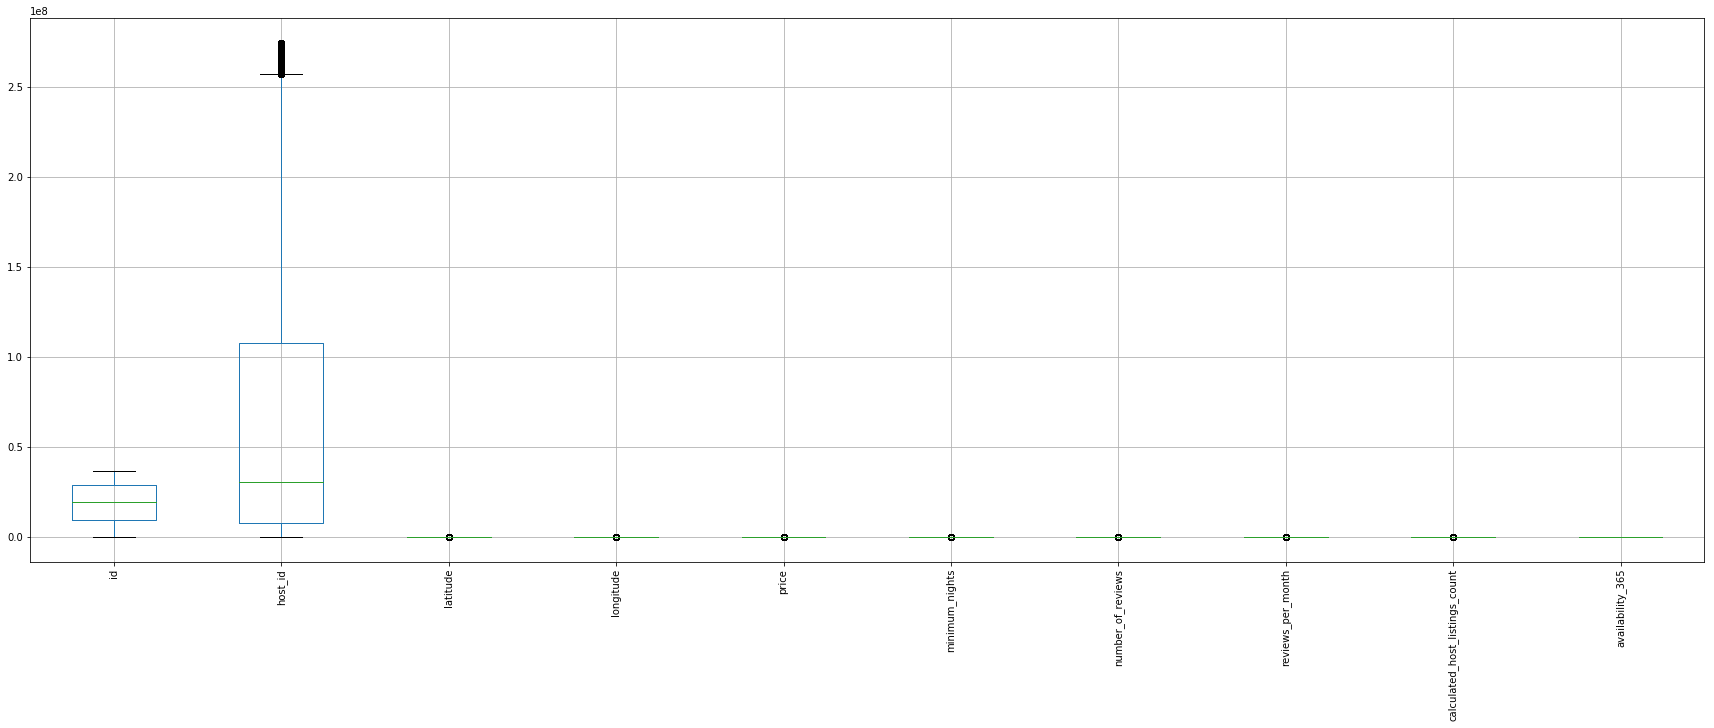

In [15]:
df_train_initial.boxplot(rot=90, figsize=(30,10))

In [16]:
#No much insight with all the graphs, so lets try with  - percentile

In [17]:

# Generic function to remove outliers

outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to
cols = list(df_train_initial) 
for column in cols: # Iterating thorough each feature
    if column in df_train_initial.select_dtypes(include=np.number).columns: # checking if the feature contains numeric data
            
            # first quartile (Q1)
        q1 = df_train_initial[column].quantile(0.01)
        if(column =='price'):
            low_cutoff_price=q1
            print(low_cutoff_price)            
            # third quartile (Q3)
        q3 = df_train_initial[column].quantile(0.99)
        if(column =='price'):
            high_cutoff_price=q3
            print(high_cutoff_price)
            # IQR
        iqr = q3 - q1
            
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':df_train_initial.loc[(df_train_initial[column] < fence_low) | (df_train_initial[column] > fence_high)].shape[0]},ignore_index=True)
print(outliers)
#print(fence_low)
#print(fence_high)

30.0
799.0
                          Feature Number of Outliers
0                              id                  0
1                         host_id                  0
2                        latitude                  0
3                       longitude                  0
4                           price                 86
5                  minimum_nights                108
6               number_of_reviews                  5
7               reviews_per_month                  3
8  calculated_host_listings_count                  0
9                availability_365                  0


In [18]:
#remove the training data with price less than low_cut_off and high_cut_off values
#new data frame is now created

In [19]:
#Remove the entries above and below this outlier price and make new datafra

#df_train_out1=df_train_initial.drop(df_train_initial[df_train_initial['price'] > 30.0].index, inplace=True )
df_train_initial.drop(df_train_initial[df_train_initial['price'] < 30.0].index, inplace=True )
# though 799 is 99 percentile outlier through manual inspection values greater than 5000 are very few and removed as of now
df_train_initial.drop(df_train_initial[df_train_initial['price'] > 1000.0].index, inplace=True )
df_train_initial.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.377000e+04,3.377000e+04,33770.000000,33770.000000,33770.000000,33770.000000,33770.000000,33770.000000,33770.000000,33770.000000
mean,1.894073e+07,6.705548e+07,40.729125,-73.952167,142.756678,6.882914,23.538496,1.101007,7.126977,112.878650
std,1.097756e+07,7.822878e+07,0.054379,0.045977,117.774807,20.003375,44.631208,1.610398,33.014106,131.640924
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.416055e+06,7.762256e+06,40.690222,-73.983140,70.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.959267e+07,3.042548e+07,40.723045,-73.955770,109.000000,3.000000,5.000000,0.380000,1.000000,45.000000
75%,2.903492e+07,1.069617e+08,40.763210,-73.936340,175.000000,5.000000,24.000000,1.620000,2.000000,227.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,1000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
#We can now see data with price less than 30 and more than 5000 is removed
#we need to take out data for which minimum_nights is greatet than 365

In [21]:
#remove outliers for minimum_nights
df_train_initial.drop(df_train_initial[df_train_initial['minimum_nights'] > 365.0].index, inplace=True )
df_train_initial.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.376100e+04,3.376100e+04,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.00000
mean,1.894218e+07,6.705863e+07,40.729126,-73.952163,142.753295,6.692693,23.543527,1.101258,7.128462,112.81606
std,1.097689e+07,7.823080e+07,0.054382,0.045980,117.778160,15.413352,44.635920,1.610530,33.018371,131.60129
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,30.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,9.423397e+06,7.761295e+06,40.690210,-73.983130,70.000000,1.000000,1.000000,0.040000,1.000000,0.00000
50%,1.960239e+07,3.042616e+07,40.723050,-73.955770,109.000000,3.000000,5.000000,0.380000,1.000000,45.00000
75%,2.903516e+07,1.069639e+08,40.763220,-73.936330,175.000000,5.000000,24.000000,1.620000,2.000000,227.00000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,1000.000000,365.000000,629.000000,58.500000,327.000000,365.00000


In [22]:
#Now lets see the values of some of the catagorical features

In [23]:
#Find neibourhood_group
df_train_initial['neighbourhood_group'].value_counts()

Manhattan        15035
Brooklyn         13843
Queens            3921
Bronx              724
Staten Island      238
Name: neighbourhood_group, dtype: int64

In [24]:
#Find neibourhood
df_train_initial['neighbourhood'].value_counts()

Williamsburg                  2742
Bedford-Stuyvesant            2540
Harlem                        1865
Bushwick                      1692
Upper West Side               1385
Hell's Kitchen                1377
East Village                  1301
Upper East Side               1237
Crown Heights                 1067
Midtown                       1057
Chelsea                        783
East Harlem                    755
Greenpoint                     731
Lower East Side                661
Astoria                        629
Washington Heights             624
Financial District             516
West Village                   511
Flatbush                       418
Clinton Hill                   417
Prospect-Lefferts Gardens      373
Long Island City               372
Park Slope                     352
Fort Greene                    337
East Flatbush                  336
Murray Hill                    327
Kips Bay                       322
Flushing                       298
Ridgewood           

In [25]:
#neibourhood values are too many groups 217. But still it is an important parameter

In [26]:
#Find neibourhood_group
df_train_initial['room_type'].value_counts()

Entire home/apt    17670
Private room       15409
Shared room          682
Name: room_type, dtype: int64

In [27]:
#before that drop un-necessary columns - hostname
df_train_initial.drop(['host_name'], axis=1, inplace=True)

In [28]:
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33761 entries, 0 to 34225
Data columns (total 15 columns):
id                                33761 non-null int64
name                              33750 non-null object
host_id                           33761 non-null int64
neighbourhood_group               33761 non-null object
neighbourhood                     33761 non-null object
latitude                          33761 non-null float64
longitude                         33761 non-null float64
room_type                         33761 non-null object
price                             33761 non-null int64
minimum_nights                    33761 non-null int64
number_of_reviews                 33761 non-null int64
last_review                       26944 non-null object
reviews_per_month                 33761 non-null float64
calculated_host_listings_count    33761 non-null int64
availability_365                  33761 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 4

In [29]:
df_train_initial.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.376100e+04,3.376100e+04,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.00000
mean,1.894218e+07,6.705863e+07,40.729126,-73.952163,142.753295,6.692693,23.543527,1.101258,7.128462,112.81606
std,1.097689e+07,7.823080e+07,0.054382,0.045980,117.778160,15.413352,44.635920,1.610530,33.018371,131.60129
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,30.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,9.423397e+06,7.761295e+06,40.690210,-73.983130,70.000000,1.000000,1.000000,0.040000,1.000000,0.00000
50%,1.960239e+07,3.042616e+07,40.723050,-73.955770,109.000000,3.000000,5.000000,0.380000,1.000000,45.00000
75%,2.903516e+07,1.069639e+08,40.763220,-73.936330,175.000000,5.000000,24.000000,1.620000,2.000000,227.00000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,1000.000000,365.000000,629.000000,58.500000,327.000000,365.00000


# Remove the host_name from test also

In [30]:
df_test_initial.drop(['host_name'], axis=1, inplace=True)
#end of test

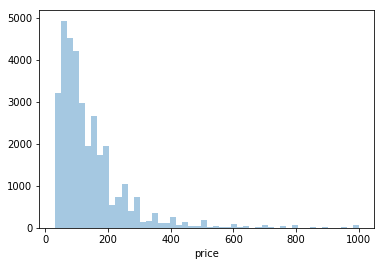

In [31]:
#letS DO SOME ANALYSIS
sns.distplot(df_train_initial["price"],kde=False)

#LETs do for other important variable - minimum_nights, number_of_reviews, reviews_per_month, 
#calculated_host_listings_count, availability_365 

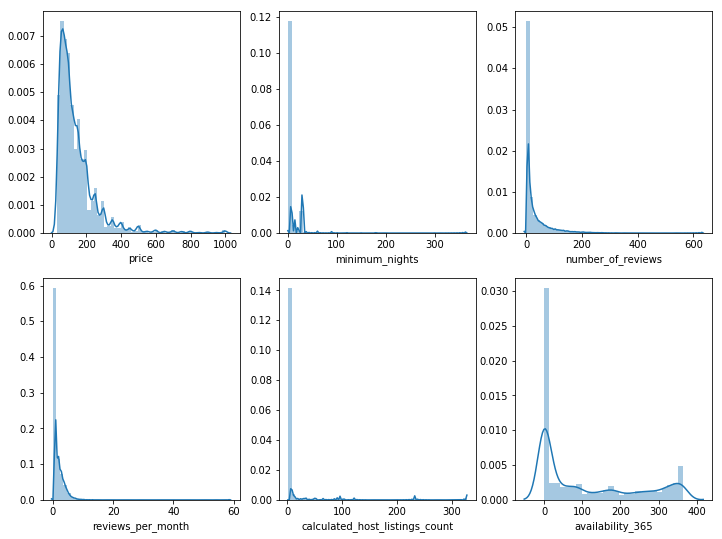

In [32]:
f, ax = plt.subplots(figsize=(12, 9))

plt.subplot(231)
sns.distplot(df_train_initial['price'])

plt.subplot(232)
sns.distplot(df_train_initial['minimum_nights'])

plt.subplot(233)
sns.distplot(df_train_initial['number_of_reviews'])

plt.subplot(234)
sns.distplot(df_train_initial['reviews_per_month'])

plt.subplot(235)
sns.distplot(df_train_initial['calculated_host_listings_count'])

plt.subplot(236)
sns.distplot(df_train_initial['availability_365'])



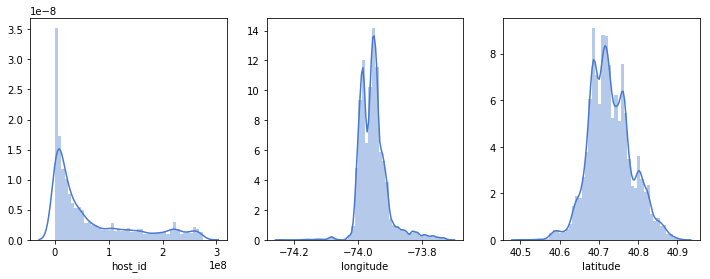

In [33]:
sns.set_palette("muted")
f, ax = plt.subplots(figsize=(12, 9))


plt.subplot(231)
sns.distplot(df_train_initial['host_id'])


plt.subplot(232)
sns.distplot(df_train_initial['longitude'])


plt.subplot(233)
sns.distplot(df_train_initial['latitude'])


#bservation - all data is left scewed

#continue the analysis

In [34]:
#Ssns.relplot(data=df_train_initial,kind="bar", y="price",x="room_type", hue="neighbourhood_group")
#sns.catplot not working for some reasone

In [35]:
# comment for now
#sns.pairplot(df_train_initial)

# Observe the correlations with price
# host_id, availability_365 do not seem to have much effect. 


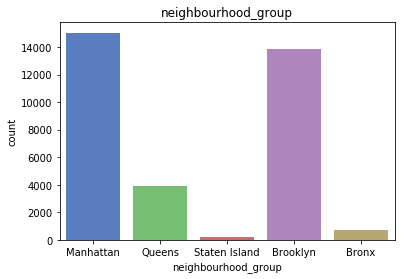

In [37]:
# do some counts
sns.countplot(df_train_initial['neighbourhood_group'])
plt.title('neighbourhood_group')
plt.ioff()

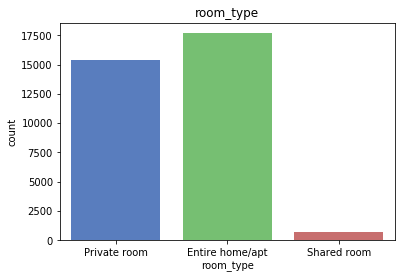

In [38]:
# do some counts
sns.countplot(df_train_initial['room_type'])
plt.title('room_type')
plt.ioff()

Text(0.5,1,'Correlation matrix')

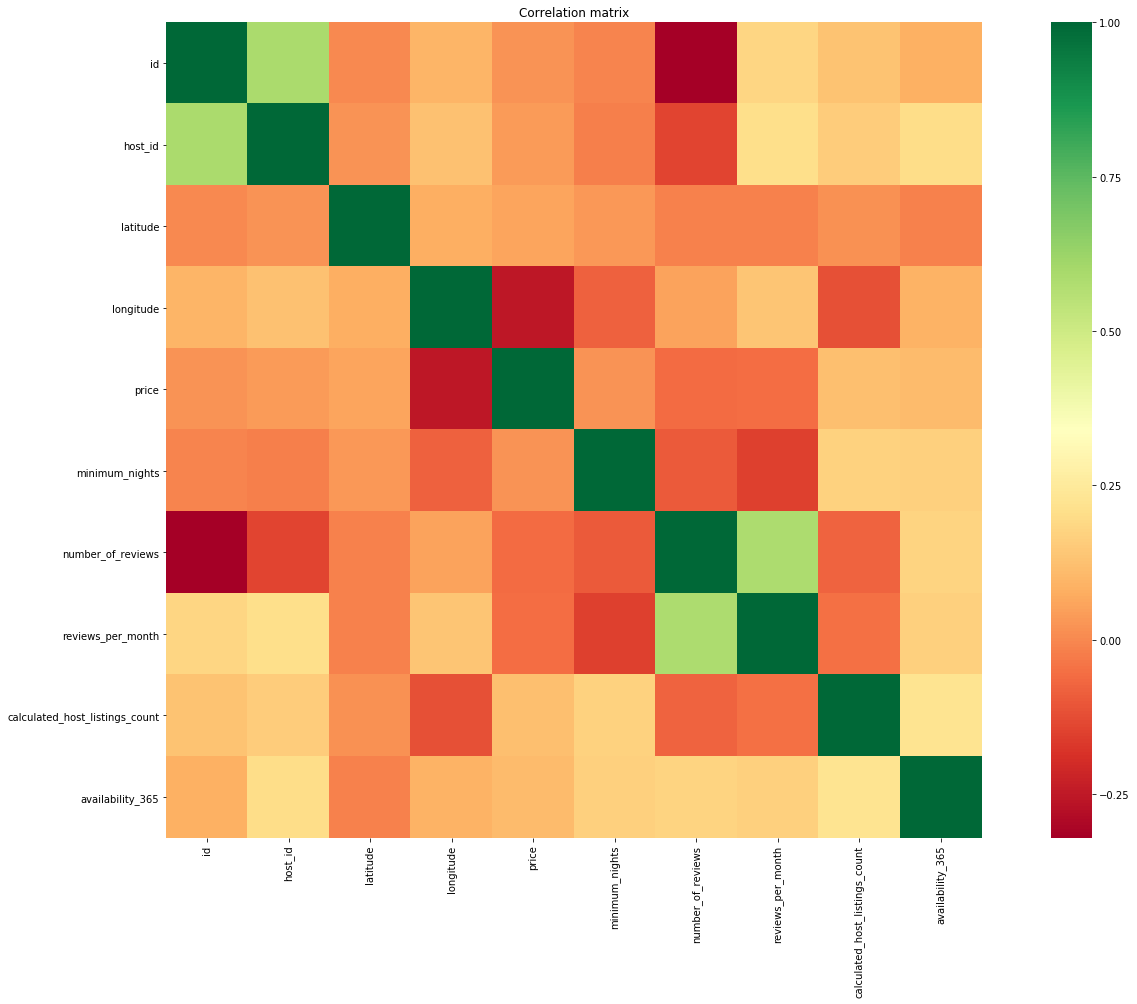

In [39]:
#LETS do some correlation
plt.figure(figsize=(25,15))
title = 'Correlation matrix'
sns.heatmap(df_train_initial.corr(), square=True, cmap='RdYlGn')
plt.title(title)

In [40]:
#observations
#reviews_per_month and number_of_reviews have same correlation, one can be removed
#so we will remove number_of_reviews

In [41]:
#pd.plotting.scatter_matrix(df_train_initial['price'], alpha=0.2)

Text(0.5,1,'Neibourhoodgroup Median Price')

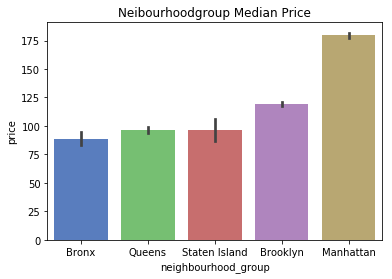

In [42]:
df_neighbourhoodgrp = df_train_initial.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df_train_initial, order=df_neighbourhoodgrp['neighbourhood_group'])
plt.title('Neibourhoodgroup Median Price')


In [43]:
print(df_neighbourhoodgrp)

  neighbourhood_group  price
0               Bronx     70
3              Queens     75
4       Staten Island     75
1            Brooklyn     93
2           Manhattan    150


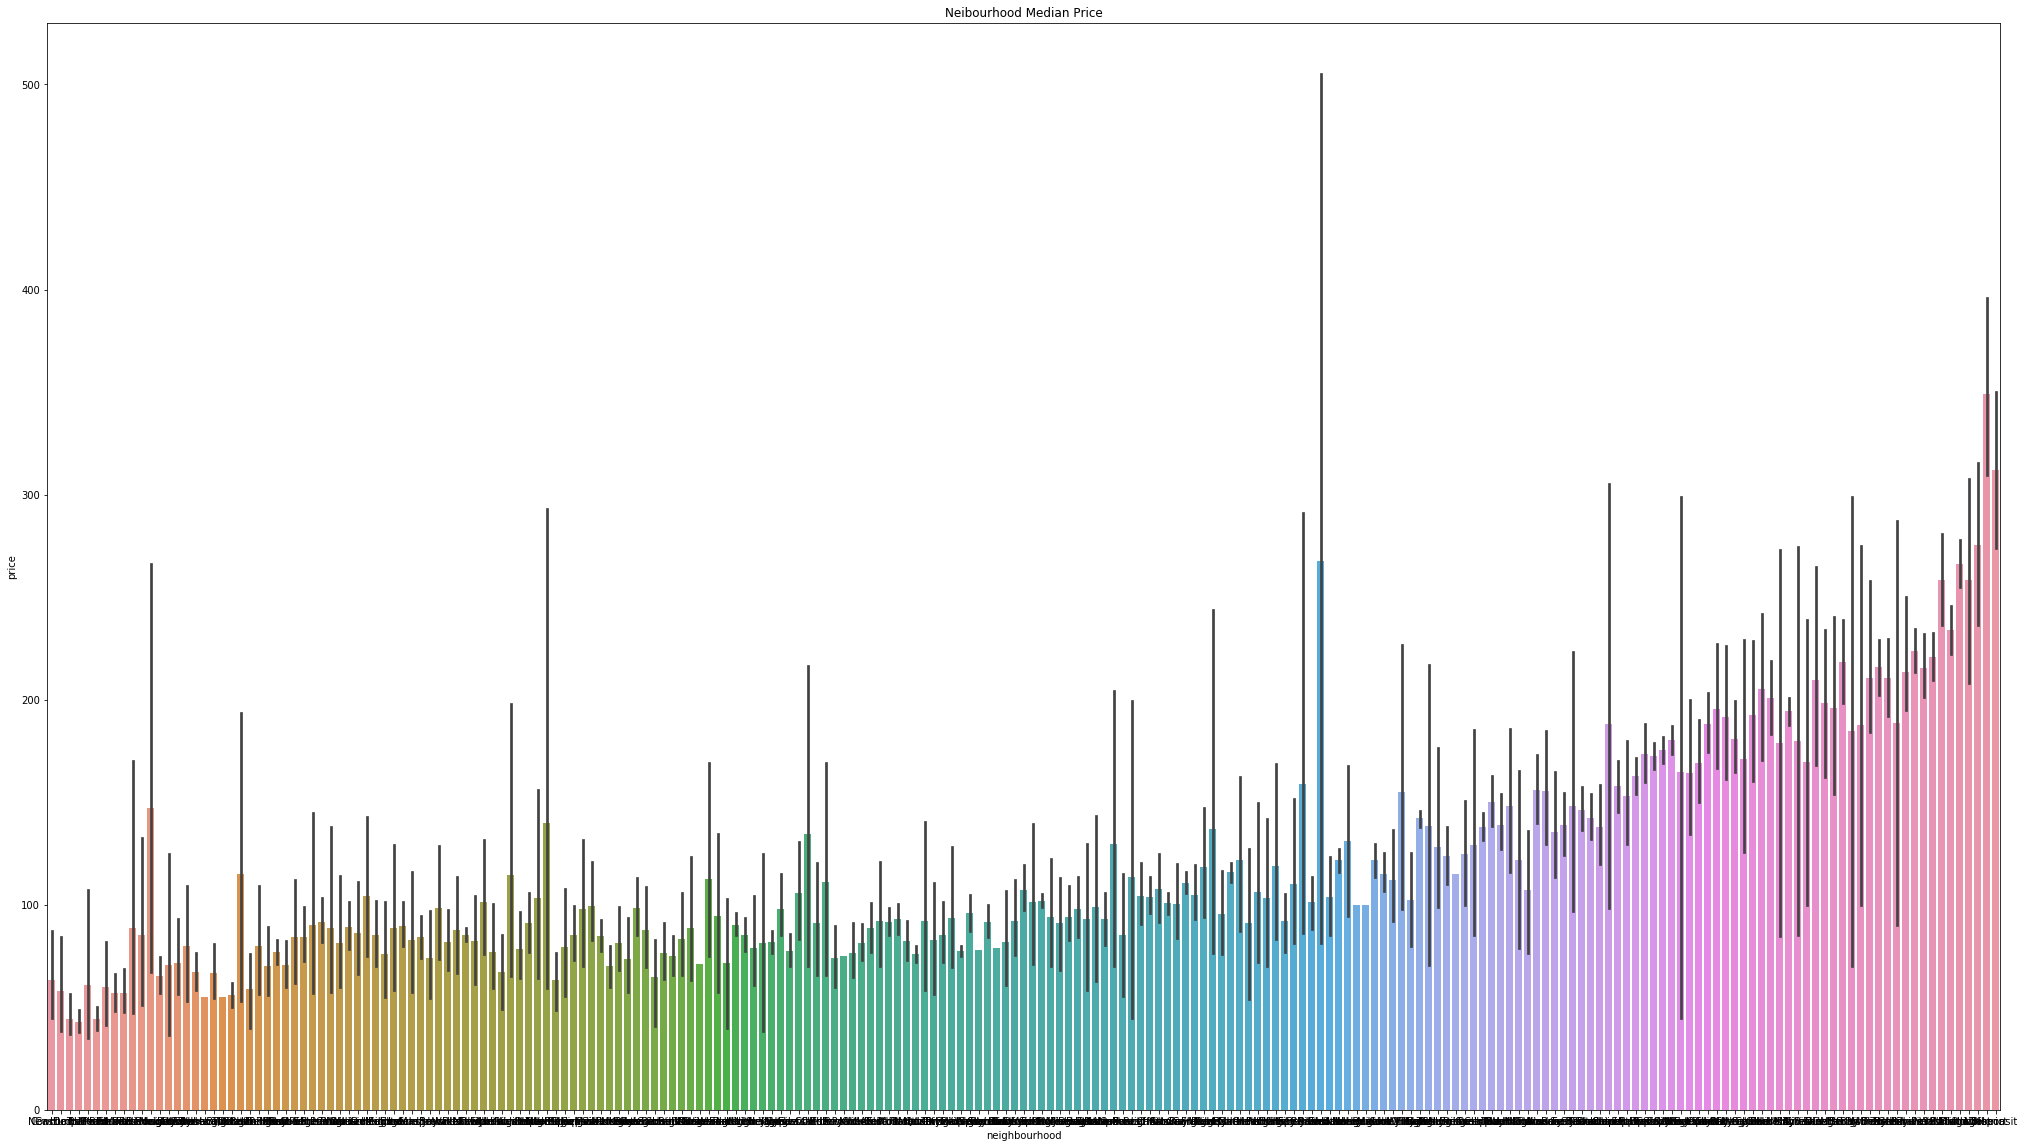

In [44]:
# same for neighbourhood
plt.figure(figsize=(35,20))
plt.title('Neibourhood Median Price')
df_neighbourhood = df_train_initial.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood', y="price", data=df_train_initial, order=df_neighbourhood['neighbourhood'])
#plt.figure.figsize(15,10)
#print(df_neighbourhood)

         room_type  price
2      Shared room     53
1     Private room     70
0  Entire home/apt    160


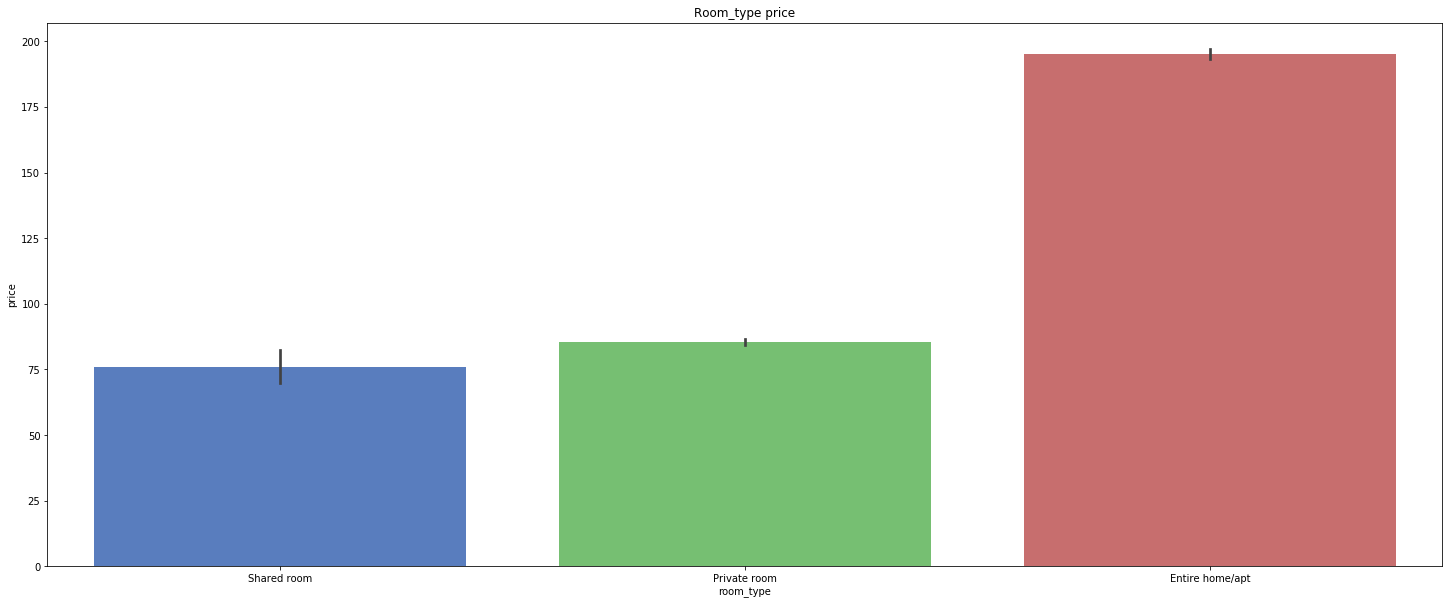

In [45]:
# same for neighbourhood
plt.figure(figsize=(25,10))
plt.title('Room_type price')
df_room_type = df_train_initial.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df_train_initial, order=df_room_type['room_type'])
#plt.figure.figsize(15,10)
#print(df_neighbourhood)
print(df_room_type)

In [46]:
#plt.figure(figsize=(35,20))
#plt.title('longitude')
#df_longitude = df_train_initial.groupby(['longitude'])['price'].aggregate(np.median).reset_index().sort_values('price')
#df_longitude = df_longitude.abs()
#data_abs=df_train_initial[['longitude','price']].abs()
#sns.barplot(x="longitude", y="price", data=data_abs, order=df_longitude['longitude'])
#plt.figure.figsize(15,10)
#print(data_abs)

In [47]:
#Another way of seeing correlations
df_train_initial.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.587418,0.004123,0.092472,0.021247,-0.009706,-0.320515,0.183506,0.132372,0.083944
host_id,0.587418,1.000000,0.023473,0.128018,0.036299,-0.018148,-0.142215,0.209109,0.155656,0.200878
latitude,0.004123,0.023473,1.000000,0.081238,0.061161,0.033208,-0.014190,-0.015222,0.018197,-0.011903
longitude,0.092472,0.128018,0.081238,1.000000,-0.253837,-0.078191,0.055487,0.135315,-0.116100,0.087054
price,0.021247,0.036299,0.061161,-0.253837,1.000000,0.024549,-0.061525,-0.056884,0.123023,0.112043
minimum_nights,-0.009706,-0.018148,0.033208,-0.078191,0.024549,1.000000,-0.096669,-0.152209,0.171052,0.164794
number_of_reviews,-0.320515,-0.142215,-0.014190,0.055487,-0.061525,-0.096669,1.000000,0.584057,-0.073061,0.179258
reviews_per_month,0.183506,0.209109,-0.015222,0.135315,-0.056884,-0.152209,0.584057,1.000000,-0.048617,0.168559
calculated_host_listings_count,0.132372,0.155656,0.018197,-0.116100,0.123023,0.171052,-0.073061,-0.048617,1.000000,0.225559
availability_365,0.083944,0.200878,-0.011903,0.087054,0.112043,0.164794,0.179258,0.168559,0.225559,1.000000


In [48]:
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33761 entries, 0 to 34225
Data columns (total 15 columns):
id                                33761 non-null int64
name                              33750 non-null object
host_id                           33761 non-null int64
neighbourhood_group               33761 non-null object
neighbourhood                     33761 non-null object
latitude                          33761 non-null float64
longitude                         33761 non-null float64
room_type                         33761 non-null object
price                             33761 non-null int64
minimum_nights                    33761 non-null int64
number_of_reviews                 33761 non-null int64
last_review                       26944 non-null object
reviews_per_month                 33761 non-null float64
calculated_host_listings_count    33761 non-null int64
availability_365                  33761 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 5

#FROM HERE we will do the second stage processing: we will first remove name field.
#Convert last_review to year_to_lastreview feature
#then encode for neighbourhood_group, neighbourhood, room_type 

In [49]:
df_train_initial.drop(['name'], axis=1, inplace=True)

# Remove from test data also

In [50]:
df_test_initial.drop(['name'], axis=1, inplace=True)
#end

In [51]:
#extract YEAR from last_review and create new column ## We need to these steps for test also from this Cell on
df_train_initial['last_review'].unique()


array(['2015-09-01', '2019-07-05', nan, ..., '2014-06-06', '2017-11-16',
       '2015-03-05'], dtype=object)

In [52]:
df_train_initial['year'] = pd.DatetimeIndex(df_train_initial['last_review']).year
df_train_initial.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,5728806,4271676,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,2015.0
2,35515415,267193767,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365,2019.0
3,36202006,43392243,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,0.00,4,82,NaN
4,3780951,16065171,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365,2019.0
5,9944426,51105827,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,2016-03-18,0.02,1,362,2016.0


In [53]:
#find the mean of highest and lowest
df_train_initial['year'].describe()

count    26944.000000
mean      2018.289601
std          1.178644
min       2011.000000
25%       2018.000000
50%       2019.000000
75%       2019.000000
max       2019.000000
Name: year, dtype: float64

In [54]:
#sum of missing values
df_train_initial['year'].isna().sum()

6817

In [55]:
#impute with mean - 2018
df_train_initial['year'].fillna( (df_train_initial['year'].mean())  ,inplace=True  )

In [56]:
#sum of missing values
df_train_initial['year'].isna().sum()

0

In [57]:
#construct year_to_review 
print(df_train_initial['year'].max())
df_train_initial['years_to_review'] = pd.DataFrame(df_train_initial['year'].max() - df_train_initial['year'])
df_train_initial.head()

2019.0


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,years_to_review
0,5728806,4271676,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,2015.000000,4.000000
2,35515415,267193767,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365,2019.000000,0.000000
3,36202006,43392243,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,0.00,4,82,2018.289601,0.710399
4,3780951,16065171,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365,2019.000000,0.000000
5,9944426,51105827,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,2016-03-18,0.02,1,362,2016.000000,3.000000


In [58]:
#check for null values for years_to_review
df_train_initial['years_to_review'].isna().sum()

0

# Do the similar steps to get years_to_review column

In [59]:
#extract YEAR from last_review and create new column
df_test_initial['last_review'].unique()


array(['2019-05-31', '2019-05-05', '2019-06-16', ..., '2014-08-25',
       '2016-09-12', '2013-05-06'], dtype=object)

In [60]:
df_test_initial['year'] = pd.DatetimeIndex(df_test_initial['last_review']).year
df_test_initial.head()


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,1525602,1200603,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39,2019.0
1,30430185,224414117,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364,2019.0
2,21354525,11743513,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108,2019.0
3,35995074,4128829,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,0.00,2,365,NaN
4,34392081,259630588,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,28,2019-06-26,14.00,2,20,2019.0


In [61]:
#sum of missing values
df_test_initial['year'].isna().sum()


3070

In [62]:
#sum of missing values
df_test_initial['year'].isna().sum()

#impute with mean - 2018
df_test_initial['year'].fillna( (df_test_initial['year'].mean())  ,inplace=True  )

In [63]:
#sum of missing values
df_test_initial['year'].isna().sum()


0

In [64]:
#construct year_to_review 
print(df_test_initial['year'].max())
df_test_initial['years_to_review'] = pd.DataFrame(df_test_initial['year'].max() - df_test_initial['year'])
df_test_initial.head()


2019.0


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,years_to_review
0,1525602,1200603,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39,2019.000000,0.000000
1,30430185,224414117,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364,2019.000000,0.000000
2,21354525,11743513,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108,2019.000000,0.000000
3,35995074,4128829,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,0.00,2,365,2018.283042,0.716958
4,34392081,259630588,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,28,2019-06-26,14.00,2,20,2019.000000,0.000000


In [65]:
#check for null values for years_to_review
df_test_initial['years_to_review'].isna().sum()


0

# End of years_to_review for test data

In [66]:
#TAKEE out the ID column , last_review,year,number_of_reviews - and host_id (for this iteration at least) is retained
#Feature now will be - host_id,latitude,longitude,       iminimum_nights,reviews_per_month,calculated_host_listings_count,availibility_365,year_to_review
#catagorical features - neighbourhood_group, neighbourhood,room_type 

In [67]:
#Take out the Id, last_review,year, number_of_reviews host_id columns
#df_train_label.drop('id',axis=1,inplace=True)
df_train_initial.drop(['id','last_review','year','number_of_reviews'],axis=1,inplace=True)

# check again
df_train_initial.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review
0,4271676,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,0.06,3,0,4.000000
2,267193767,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4.00,1,365,0.000000
3,43392243,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0.00,4,82,0.710399
4,16065171,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,0.27,1,365,0.000000
5,51105827,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,0.02,1,362,3.000000


# Remove parameters   last_review,year, number_of_reviews columns from test also: Take out test id separatey

In [68]:
#Take out the Id, last_review,year, number_of_reviews columns, host_id
#df_train_label.drop('id',axis=1,inplace=True)
Id = df_test_initial[['id']]
df_test_initial.drop(['id','last_review','year','number_of_reviews'],axis=1,inplace=True)

#keep 'id' as of now - we need to take towards the end and add back
# check again
df_test_initial.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review
0,1200603,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,1.70,1,39,0.000000
1,224414117,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,2.49,30,364,0.000000
2,11743513,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,4.29,1,108,0.000000
3,4128829,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0.00,2,365,0.716958
4,259630588,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,14.00,2,20,0.000000


# Lets do one final comparison between test and train data and normalize both

In [69]:
#check train data
df_train_initial.info() # we are good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33761 entries, 0 to 34225
Data columns (total 12 columns):
host_id                           33761 non-null int64
neighbourhood_group               33761 non-null object
neighbourhood                     33761 non-null object
latitude                          33761 non-null float64
longitude                         33761 non-null float64
room_type                         33761 non-null object
price                             33761 non-null int64
minimum_nights                    33761 non-null int64
reviews_per_month                 33761 non-null float64
calculated_host_listings_count    33761 non-null int64
availability_365                  33761 non-null int64
years_to_review                   33761 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 4.6+ MB


In [70]:
#check test data
df_test_initial.info() # we are good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 11 columns):
host_id                           14669 non-null int64
neighbourhood_group               14669 non-null object
neighbourhood                     14669 non-null object
latitude                          14669 non-null float64
longitude                         14669 non-null float64
room_type                         14669 non-null object
minimum_nights                    14669 non-null int64
reviews_per_month                 14669 non-null float64
calculated_host_listings_count    14669 non-null int64
availability_365                  14669 non-null int64
years_to_review                   14669 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1.2+ MB


In [71]:
Id.head()

,id
0,1525602
1,30430185
2,21354525
3,35995074
4,34392081


# We will try with label encoding first and then rework from here to do one-hotencoding
# For that we will make two copies of base datasets


In [72]:
#making copies of datasets one set for encoding types another for hostid
df_train_hostid_label=df_train_initial.copy(deep=True)
df_train_hostid_onehot=df_train_initial.copy(deep=True)
#df_train_nohostid_label=df_train_initial.copy(deep=True)
#df_train_nohostid_onehot=df_train_initial.copy(deep=True)

#Similarly for Test data
df_test_hostid_label=df_test_initial.copy(deep=True)
df_test_hostid_onehot=df_test_initial.copy(deep=True)

In [73]:
#Create the label encoded data
#Initializing lable encoder
le = LabelEncoder()

#Code that auto encodes any dataframe column of type category or object.        
columnsToEncode = list(df_train_hostid_label.select_dtypes(include=['object']))
print(' '.join(columnsToEncode))
#Initializing Label Encoder
le = LabelEncoder()

#Iterating through each of the categorical columns and label encoding them
for feature in columnsToEncode:
    try:
        df_train_hostid_label[feature] = le.fit_transform(df_train_hostid_label[feature])
    except:
        print('Error encoding '+feature)

neighbourhood_group neighbourhood room_type


In [74]:
df_train_hostid_label.head() 


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review
0,4271676,2,143,40.72217,-73.99481,1,120,7,0.06,3,0,4.000000
2,267193767,3,59,40.75558,-73.89316,0,200,2,4.00,1,365,0.000000
3,43392243,4,46,40.60110,-74.07830,2,30,2,0.00,4,82,0.710399
4,16065171,2,93,40.81022,-73.94266,2,115,1,0.27,1,365,0.000000
5,51105827,2,6,40.71192,-74.01572,0,225,90,0.02,1,362,3.000000


In [75]:
#check the encoded values

In [76]:
df_train_hostid_label.describe() 


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review
count,3.376100e+04,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.000000,33761.00000,33761.000000
mean,6.705863e+07,1.677320,106.169189,40.729126,-73.952163,0.496816,142.753295,6.692693,1.101258,7.128462,112.81606,0.710399
std,7.823080e+07,0.732148,67.951423,0.054382,0.045980,0.538888,117.778160,15.413352,1.610530,33.018371,131.60129,1.052942
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,30.000000,1.000000,0.000000,1.000000,0.00000,0.000000
25%,7.761295e+06,1.000000,51.000000,40.690210,-73.983130,0.000000,70.000000,1.000000,0.040000,1.000000,0.00000,0.000000
50%,3.042616e+07,2.000000,93.000000,40.723050,-73.955770,0.000000,109.000000,3.000000,0.380000,1.000000,45.00000,0.000000
75%,1.069639e+08,2.000000,176.000000,40.763220,-73.936330,1.000000,175.000000,5.000000,1.620000,2.000000,227.00000,1.000000
max,2.743115e+08,4.000000,216.000000,40.913060,-73.712990,2.000000,1000.000000,365.000000,58.500000,327.000000,365.00000,8.000000


In [77]:
#try dropping values one by one 
#availability_365
#X= df_train_hostid_label.drop("availability_365",axis=1)
#X= df_train_hostid_label.drop("host_id",axis=1)

#OUR training dataset for label encoded data with  is ready
#Lets try building the models now - initial we will build regression model

In [78]:
#Option 1 
# break x,y 
X= df_train_hostid_label.drop("price",axis=1)
Y=df_train_hostid_label["price"]


# Do the same steps for test also

In [79]:
#Create the label encoded data
#Initializing lable encoder
#le2 = LabelEncoder()

#Code that auto encodes any dataframe column of type category or object.        
columnsToEncode2 = list(df_test_hostid_label.select_dtypes(include=['object']))
print(' '.join(columnsToEncode2))
#Initializing Label Encoder
le2 = LabelEncoder()

#Iterating through each of the categorical columns and label encoding them
for feature in columnsToEncode2:
    try:
        df_test_hostid_label[feature] = le2.fit_transform(df_test_hostid_label[feature])
    except:
        print('Error encoding '+feature)

neighbourhood_group neighbourhood room_type


In [80]:
# check df_test_hostid_label
df_test_hostid_label.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review
0,1200603,1,49,40.66751,-73.95867,0,2,1.70,1,39,0.000000
1,224414117,2,93,40.75655,-73.99690,1,1,2.49,30,364,0.000000
2,11743513,1,24,40.69252,-73.99121,1,1,4.29,1,108,0.000000
3,4128829,3,52,40.77292,-73.90101,1,9,0.00,2,365,0.716958
4,259630588,1,200,40.71863,-73.94980,1,1,14.00,2,20,0.000000


In [81]:
#create linear regression model
lin_reg = LinearRegression()
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
#predict Y
Y_predict=lin_reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [83]:
df_predicted.describe()


,Actual,Predicted
count,10129.000000,10129.000000
mean,142.911837,141.187481
std,120.202427,61.880431
min,30.000000,-87.000000
25%,69.000000,91.000000
50%,105.000000,146.000000
75%,175.000000,193.000000
max,1000.000000,331.000000


In [84]:
df_predicted.head(25)


,Actual,Predicted
0,60,109.0
1,130,164.0
2,230,86.0
3,280,199.0
4,180,187.0
5,70,107.0
6,150,163.0
7,378,144.0
8,120,189.0
9,75,148.0


In [85]:
#Find RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))


RMSE 102.19


# RMSE values are too high and predictions are not close
#one option is to use scalar
#second option is to use log-transorm for the data
#but before that lets try cross-validation and see if it improves the score

# NOW try with the test data

In [86]:
#create linear regression model
#lin_reg2 = LinearRegression()
#perform the test,train split within the training data
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
#lin_reg2.fit(X, Y)


In [87]:
#predict Y with test data
Y_predict2=lin_reg.predict(df_test_hostid_label)
df_predicted2=pd.DataFrame({
                         'Predicted':np.round(Y_predict2,0) }
                            ).reset_index(drop=True)

In [88]:
#print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

In [89]:
df_predicted2.head(25)


,Predicted
0,156.0
1,172.0
2,80.0
3,111.0
4,43.0
5,181.0
6,188.0
7,43.0
8,78.0
9,171.0


In [90]:
submission = pd.concat([Id,df_predicted2['Predicted']],1)
submission.to_csv('../data/submission.csv',index=False)

# End of Test and submission

# End of test data

In [91]:
#lets use scalar

scaler = MinMaxScaler(feature_range=(0,1))
Xs = scaler.fit_transform(X)         # refer cell 71 from where values are coming 
Xs.shape

(33761L, 11L)

In [92]:
#continue the steps of breaking into test and train data

In [93]:
#create linear regression model
lin_reg_scalar = LinearRegression()
#perform the test,train split within the training data
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(Xs, Y, test_size = 0.3, random_state = 0) #same variable X,Y           
#fit the regressor
lin_reg_scalar.fit(Xt_train, Yt_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
#predict Y again for scalar
Yt_predict=lin_reg_scalar.predict(Xt_test)
df_predicted_scalar=pd.DataFrame(
                            {'Actual':  np.round(Yt_test,0),
                            'Predicted':np.round(Yt_predict,0) }
                            ).reset_index(drop=True)

In [95]:
df_predicted_scalar.head(20)

,Actual,Predicted
0,60,109.0
1,130,164.0
2,230,86.0
3,280,199.0
4,180,187.0
5,70,107.0
6,150,163.0
7,378,144.0
8,120,189.0
9,75,148.0


In [96]:
print('RMSE %.2f'%sqrt(mean_squared_error(Yt_test,Yt_predict)))


RMSE 102.19


# No difference using scalar - little difference

# check with cross validation 


In [97]:
# Create 10 folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 

modelonecv = LinearRegression()


# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelonecv, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))


[-10894.43948826 -10437.38830436  -9988.69634168 -10688.85294376
  -9658.47386288  -9323.88360545  -9472.21371899  -9317.30272704
  -9421.46464001 -10622.34643356]
('Mean:', -9982.506206597815)
('Std:', 591.8903616422463)
('RMSE', 99.91249274539102)


# The value of RMSE is slightly rediced to 99.91; a slight improvement
# we will check with 5 splits for cv


In [98]:
# Trial with 5  folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create a model 

modelonecv = LinearRegression()


# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelonecv, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))


[-10669.59170081 -10338.8246025   -9494.33450725  -9396.53872767
 -10018.63415879]
('Mean:', -9983.584739403661)
('Std:', 486.2135709290827)
('RMSE', 99.91788998674693)


# The value of RMSE is not changed with reducing splits to 5 for CV
# Need to discard the label encoding and consider one-hot encoding and follow all the steps from cell -56 onwards with data
#

# START of trail 2 - one-hot-encoding
# Encoding categorical data for room_type, neighborhood,neibhorood group

In [100]:
#df_train_hostid_onehot.reset_index(drop=True)

In [101]:
#catagorical encoding code
df_train_hostid_onehot = pd.get_dummies(df_train_hostid_onehot, columns=['room_type'], drop_first=True)
df_train_hostid_onehot = pd.get_dummies(df_train_hostid_onehot, columns=['neighbourhood'], drop_first=True)
df_train_hostid_onehot = pd.get_dummies(df_train_hostid_onehot, columns=['neighbourhood_group'], drop_first=True)
### Could also try the following
###le_two = LabelEncoder()
###df_train_hostid_onehot['room_type'] = le_two.fit_transform(df_train_hostid_onehot['room_type'])


In [102]:
df_train_hostid_onehot.head()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

In [103]:
 df_train_hostid_onehot.head()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

In [104]:
#check encoded values
df_train_hostid_onehot.describe() 

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

In [106]:
#check encoded values
df_train_hostid_onehot.shape


(33761, 231)

# One hot encode test data - ignore for now

In [107]:
## encode test data
#df_test_hostid_onehot = pd.get_dummies(df_test_hostid_onehot, columns=['room_type'], drop_first=True)
#df_test_hostid_onehot = pd.get_dummies(df_test_hostid_onehot, columns=['neighbourhood'], drop_first=True)
#df_test_hostid_onehot = pd.get_dummies(df_test_hostid_onehot, columns=['neighbourhood_group'], drop_first=True)


In [108]:

##check encoded values
#df_test_hostid_onehot.describe() 


In [109]:
##check encoded values
#df_test_hostid_onehot.shape


# End: one hot encode test data

In [110]:
#MAKE A COPY at this point for future reference
df_train_hostid_onehot_copy=df_train_hostid_onehot.copy(deep=True)
# we may need for another branch with longitude,latitude consideration

In [111]:
#Begin regression option 1 With one hat encoded data

X= df_train_hostid_onehot.drop("price",axis=1)
Y=df_train_hostid_onehot["price"]

X.describe()


,host_id,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbourhood

In [112]:
#create linear regression model
lin_reg_one = LinearRegression()
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg_one.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
#predict Y
Y_predict=lin_reg_one.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [114]:
df_predicted.describe()


,Actual,Predicted
count,10129.000000,10129.000000
mean,142.911837,141.463817
std,120.202427,69.785298
min,30.000000,-163.000000
25%,69.000000,81.000000
50%,105.000000,141.000000
75%,175.000000,193.000000
max,1000.000000,402.000000


# BETTER VALUES this time - compare with cell 95 values
#
               Actual               Predicted
#count          10129.000000        10129.000000
#mean           142.911837           141.187481
#std            120.202427           61.880431
#min             30.000000          -87.000000
#25%             69.000000           91.000000
#50%             105.000000          146.000000
#75%             175.000000          193.000000
#max            1000.000000          331.000000


In [115]:
df_predicted.head(25)


,Actual,Predicted
0,60,106.0
1,130,134.0
2,230,93.0
3,280,148.0
4,180,187.0
5,70,137.0
6,150,155.0
7,378,219.0
8,120,189.0
9,75,154.0


In [116]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 97.07


# RMSE values are still high and predictions are not close though better
#one option is to use scalar but we have tried last time and did not work
#second option is to use log-transorm for the data ?
#lets try cross-validation and see if it improves the score first

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from math import sqrt
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 
modelone = LinearRegression() #to indicate one hot encoding

# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelone, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))

[-9851.3971238  -9331.65763446 -9031.25340438 -9634.77481153
 -8978.45259518 -8385.90050901 -8650.70365667 -8673.01202148
 -8571.17096663 -9422.28550172]
('Mean:', -9053.060822485952)
('Std:', 466.83681416495426)
('RMSE', 95.14757391802458)


## The value of RMSE is improved to 95.14; better than with Label encoding
## Further considerations are required to improve the model
#consider logTransform of features, outliers at different range in price,latitude,longitude considerations.

In [118]:
# IGNORE this plot for now  - not quite readable

#plt.figure(figsize=(20,10))
#plt.plot(Y_test,Y_predict)
#plt.suptitle('Comparison', fontsize=20)
#plt.xlabel('Actual',fontsize=25)
#plt.ylabel('Predicted',fontsize=25)
#plt.show()

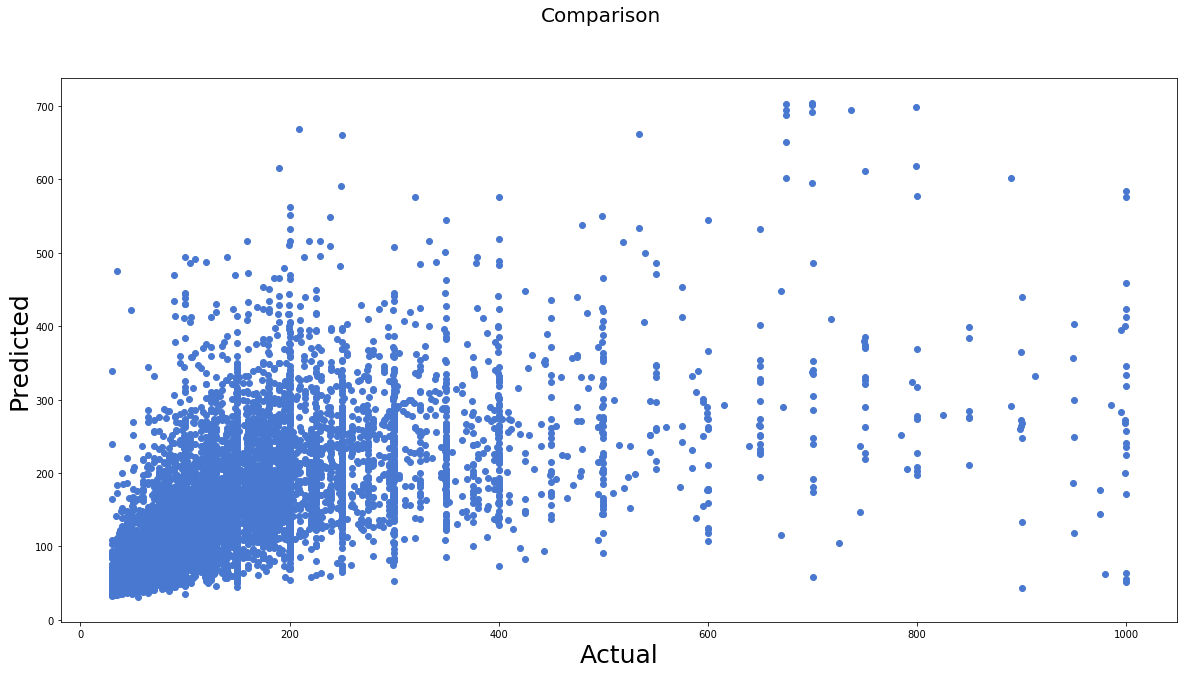

In [180]:
#Other way of plot -- comment for now
plt.figure(figsize=(20,10))
plt.scatter(Y_test, Y_predict)
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Actual',fontsize=25)
plt.ylabel('Predicted',fontsize=25)
plt.show()

# Observations
#The band is quite high
#There are some negetive predicted values - need to check how to avoid the same by improving the model
#For the same price, for some values, say for example 600 there is wide band of prediction: may be we need to localized analysis for one such cluster to get further insights 
#seems like predictions within 250 are better than those greated than 250

In [120]:
#Sdf_train_initial['price']==600
df_600=df_train_initial[df_train_initial['price'] == 600.0]

In [121]:
df_600.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 150 to 33926
Data columns (total 12 columns):
host_id                           57 non-null int64
neighbourhood_group               57 non-null object
neighbourhood                     57 non-null object
latitude                          57 non-null float64
longitude                         57 non-null float64
room_type                         57 non-null object
price                             57 non-null int64
minimum_nights                    57 non-null int64
reviews_per_month                 57 non-null float64
calculated_host_listings_count    57 non-null int64
availability_365                  57 non-null int64
years_to_review                   57 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 5.8+ KB


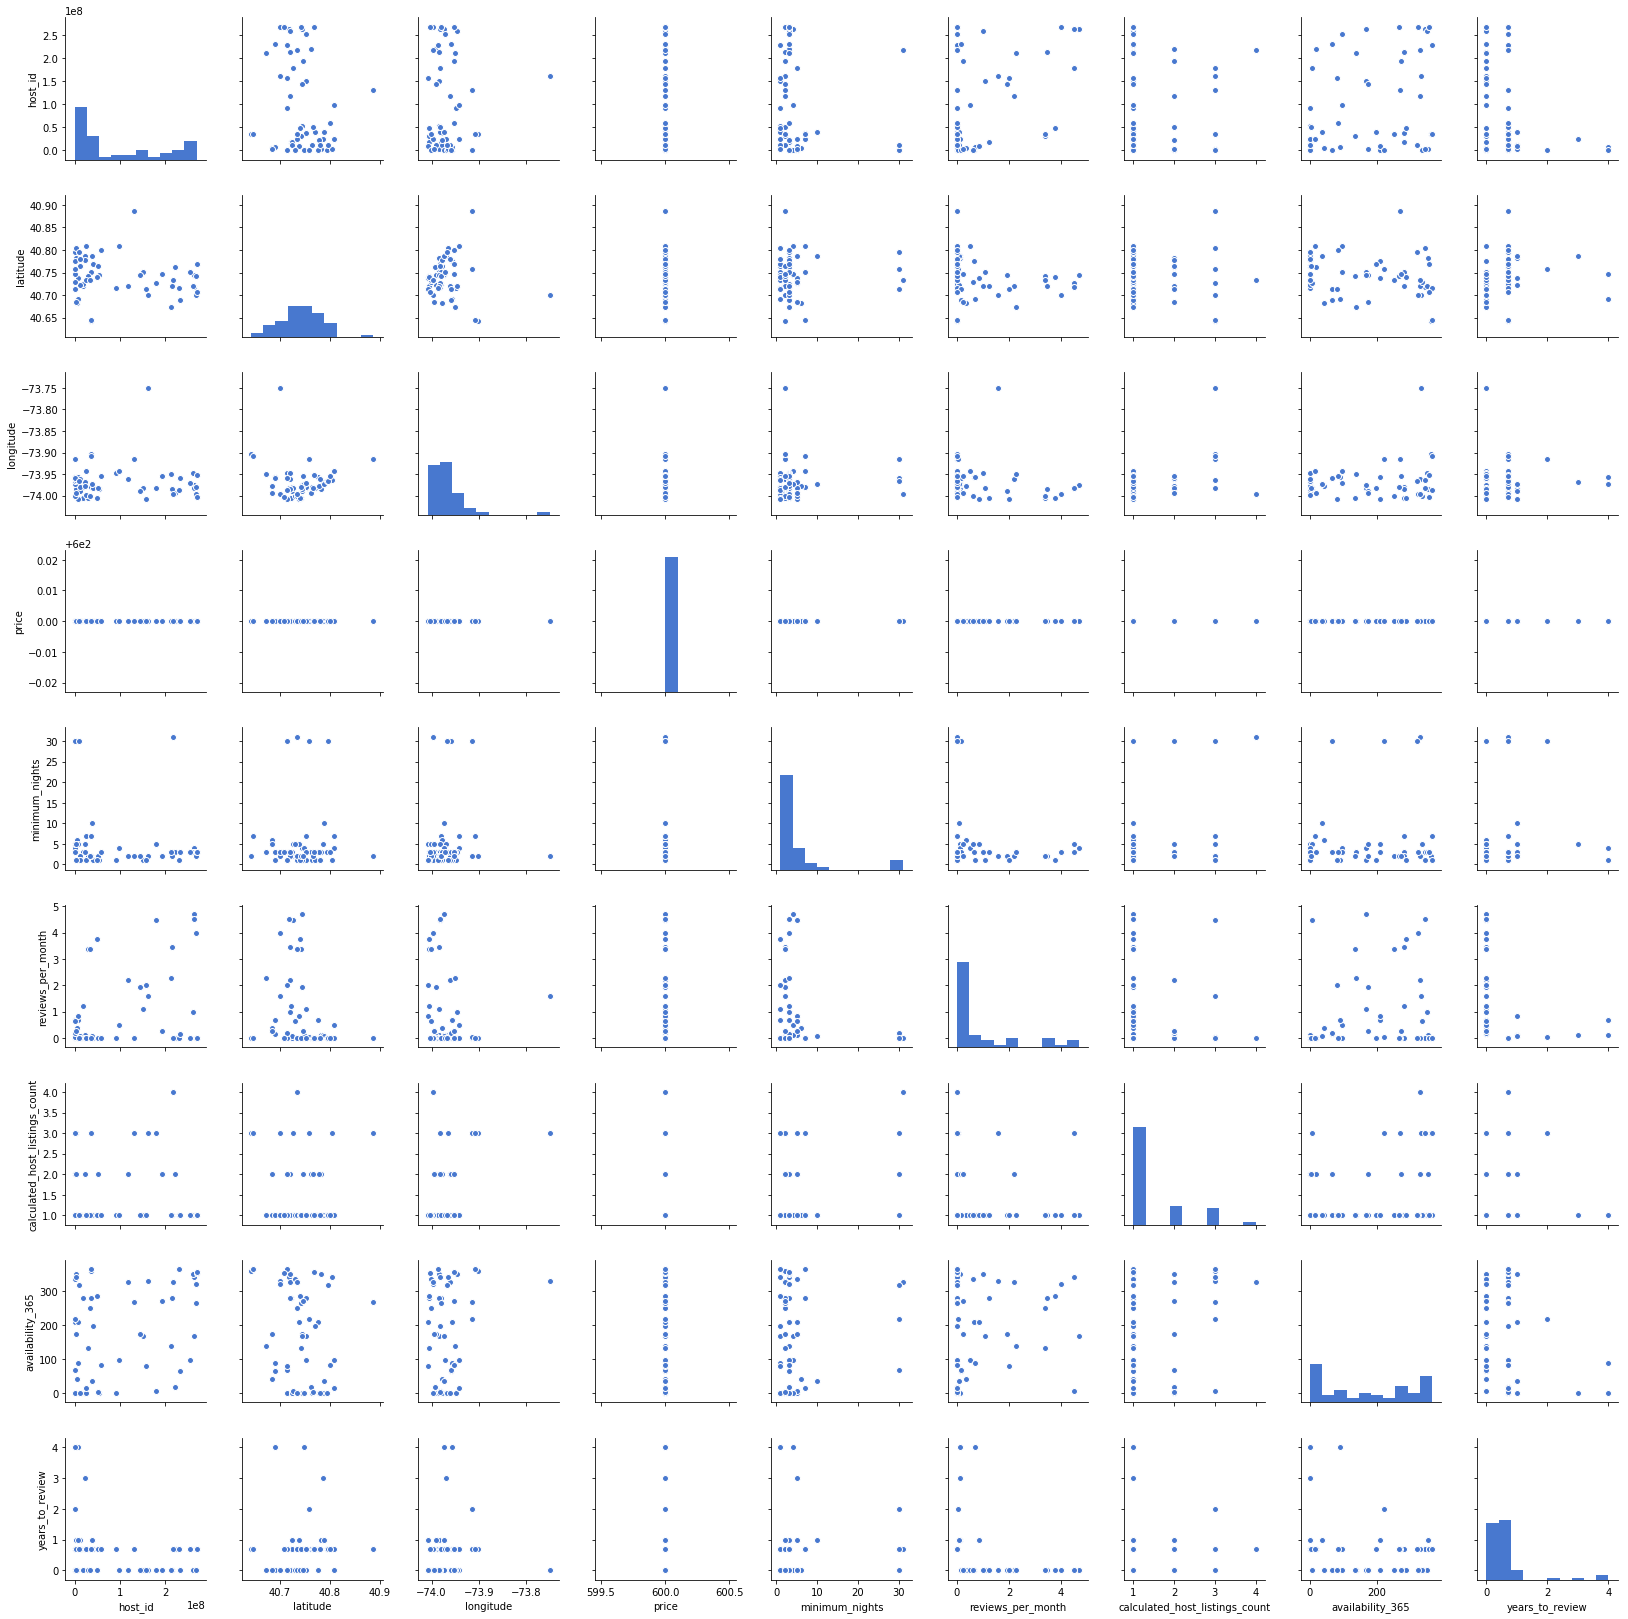

In [122]:
sns.pairplot(df_600)

# From the above and the other pairplot that was done initially for the full data, we can safely remove host_id, availability_365

# LETs add distance from CITY center as new parameter
#CITY center latitude, longitude from google search - 40.730610, -73.935242.
#OR can be taken as mean values in the dataframe for simplicity which are very close

In [123]:
#function to find distance
#https://stackoverflow.com/questions/56079085/how-do-i-overcome-the-typeerror-cannot-convert-the-series-to-class-float-er
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    #print(lon1,lat1,lon2,lat2)  
    #lon1, lat1, lon2, lat2 = np.radians([lon1, lat1, lon2, lat2])
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    #a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    #c = 2 * asin(sqrt(a)) 
    a = (dlat/2).apply(lambda x : sin(x)) ** 2 + lat1.apply(lambda x : cos(x)) * lat2.apply(lambda x:cos(x))* (dlon/2).apply(lambda x : sin(x)) ** 2 
    c = 2 * a.apply(lambda x : asin(sqrt(x))) 
    results = 3959.0 * c 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

print('End of function')
#test=haversine(-73.935242,40.730610,df_train_initial.loc[0,'longitude'],df_train_initial.loc[0,'latitude']) WORKS
#df_train_initial['distance_cc'] = df_train_initial.applymap(haversine(-73.935242,40.730610,-73.935242,40.730610)) #DID NOT
#Add the columns lat_ny, long_ny that corrospond to the vlaues -73.935242, 40.730610 
df_train_hostid_onehot['lat_ny'] = '40.730610'
df_train_hostid_onehot['lat_ny'] = df_train_hostid_onehot['lat_ny'].astype(float)
df_train_hostid_onehot['long_ny'] = '-73.935242'
df_train_hostid_onehot['long_ny'] = df_train_hostid_onehot['long_ny'].astype(float)
df_train_hostid_onehot.info()
df_train_hostid_onehot['distance_cc'] =haversine(np.radians(df_train_hostid_onehot['long_ny']), np.radians(df_train_hostid_onehot['lat_ny']),np.radians(df_train_hostid_onehot['longitude']), np.radians(df_train_hostid_onehot[ 'latitude']) )



End of function
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33761 entries, 0 to 34225
Columns: 233 entries, host_id to long_ny
dtypes: float64(6), int64(5), uint8(222)
memory usage: 10.2 MB


In [124]:
df_train_hostid_onehot.head(10)


,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

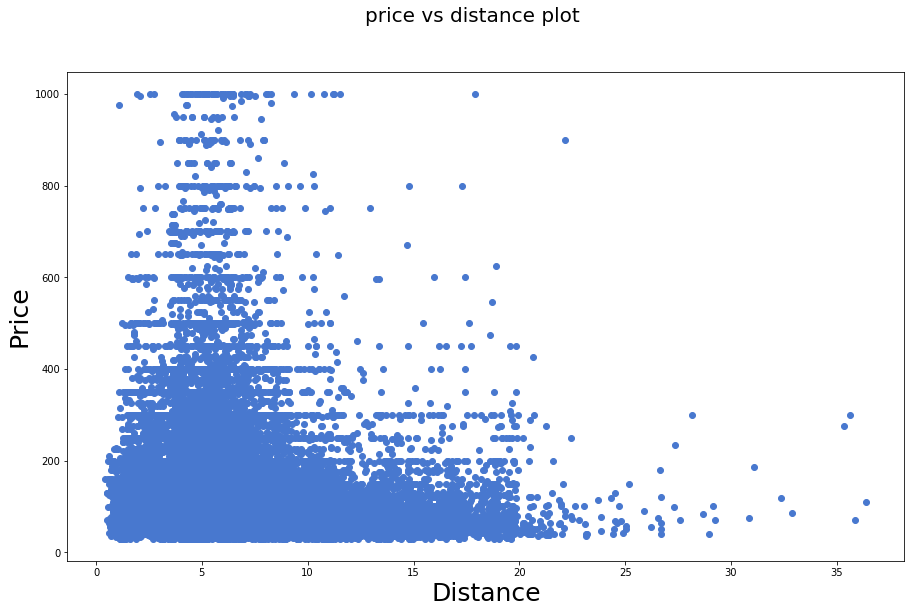

In [125]:
# we will do quick plot and check price and df_train_hostid_onehot['distance_cc']

plt.figure(figsize=(15,9))
plt.scatter(df_train_hostid_onehot['distance_cc'],df_train_hostid_onehot['price'])
plt.suptitle('price vs distance plot', fontsize=20)
plt.xlabel('Distance',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.show()
         

#Lets plot for the values of price = 600
plt.figure(figsize=(15,9))
plt.scatter(df_train_initial['distance_cc'],df_train_initial['price']['price'] == 600)
plt.suptitle('price vs distance plot', fontsize=20)
plt.xlabel('Distance',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.show()

# The plot is indicating the google values of latitude and longitute may not be accurate
# we will try taking the avarage values within from the dataset

In [126]:
df_train_hostid_onehot['lat_ny'] = df_train_hostid_onehot['latitude'].mean()
#df_train_hostid_onehot['lat_ny'] = df_train_hostid_onehot['lat_ny'].astype(float)
df_train_hostid_onehot['long_ny'] = df_train_hostid_onehot['longitude'].mean()
#df_train_hostid_onehot['long_ny'] = df_train_hostid_onehot['long_ny'].astype(float)
df_train_hostid_onehot['distance_cc'] =haversine(np.radians(df_train_hostid_onehot['long_ny']), np.radians(df_train_hostid_onehot['lat_ny']),np.radians(df_train_hostid_onehot['longitude']), np.radians(df_train_hostid_onehot[ 'latitude']) )
df_train_initial.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33761 entries, 0 to 34225
Data columns (total 12 columns):
host_id                           33761 non-null int64
neighbourhood_group               33761 non-null object
neighbourhood                     33761 non-null object
latitude                          33761 non-null float64
longitude                         33761 non-null float64
room_type                         33761 non-null object
price                             33761 non-null int64
minimum_nights                    33761 non-null int64
reviews_per_month                 33761 non-null float64
calculated_host_listings_count    33761 non-null int64
availability_365                  33761 non-null int64
years_to_review                   33761 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 4.6+ MB


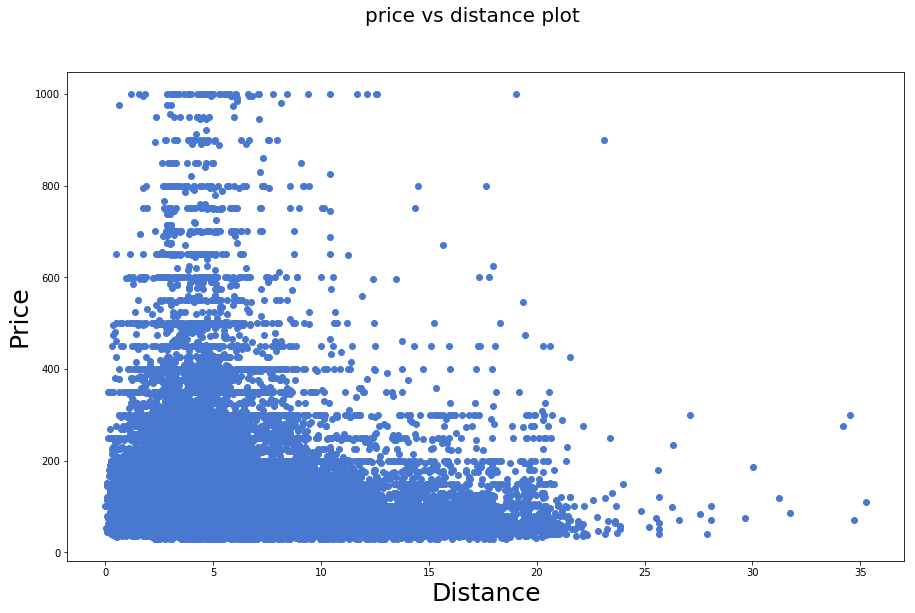

In [127]:
# we will do quick plot and check price and df_train_initial['distance_cc']

plt.figure(figsize=(15,9))
plt.scatter(df_train_hostid_onehot['distance_cc'],df_train_initial['price'])
plt.suptitle('price vs distance plot', fontsize=20)
plt.xlabel('Distance',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.show()


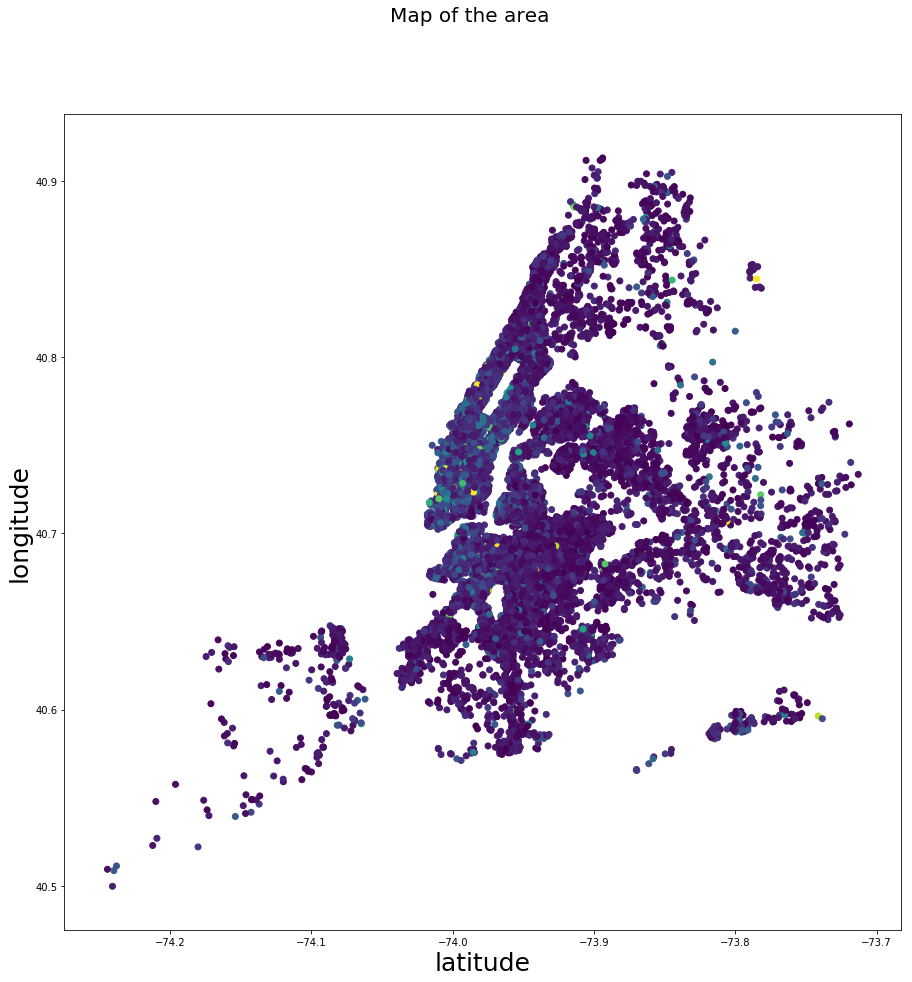

In [128]:
#LETS do a plot
plt.figure(figsize=(15,15))
plt.scatter(df_train_initial['longitude'],df_train_hostid_onehot['latitude'],c=df_train_initial['price'])
plt.suptitle('Map of the area', fontsize=20)
plt.xlabel('latitude',fontsize=25)
plt.ylabel('longitude',fontsize=25)
plt.show()

# This is slightly better.

# Even this appoach does not seem to be fully correct. 
# Ideally we should have max price near zero but we have it at about 5; which means the hypothetical price centre is still away
# We find that 'Neponsit' neighbouhood has the highest avarage price, so we will make that has centre and check 

In [129]:
## Median Latitude of Neposit - test with the df_train_initial only so that the changes are not done to df_initial_hostid_onehot
df_neighbourhood_lat = df_train_initial.groupby(["neighbourhood"])['latitude'].aggregate(np.median).reset_index().sort_values('latitude')
filtered_data_lat = df_neighbourhood_lat[df_neighbourhood["neighbourhood"]=="Neponsit"]
filtered_data_lat


,neighbourhood,latitude
138,Neponsit,40.57073


In [130]:
## Median longitude of Neposit 
df_neighbourhood_long = df_train_initial.groupby(["neighbourhood"])['longitude'].aggregate(np.median).reset_index().sort_values('longitude')
filtered_data_long = df_neighbourhood_long[df_neighbourhood["neighbourhood"]=="Neponsit"]
filtered_data_long


,neighbourhood,longitude
138,Neponsit,-73.85972


In [131]:
## Re-create distance_cc data column with the values of Neponsit neighbourhood lat and long values
df_train_initial['lat_ny'] = filtered_data_lat['latitude'].mean()
df_train_initial['lat_ny'] = df_train_initial['lat_ny'].astype(float)
df_train_initial['long_ny'] = filtered_data_long['longitude'].mean()
df_train_initial['long_ny'] = df_train_initial['long_ny'].astype(float)
#df_train_initial.info()
df_train_initial['distance_cc'] =haversine(np.radians(df_train_initial['long_ny']), np.radians(df_train_initial['lat_ny']),np.radians(df_train_initial['longitude']), np.radians(df_train_initial[ 'latitude']) )



In [132]:
#df_train_initial.head()

In [133]:
df_train_initial['distance_cc'][df_train_initial["neighbourhood"]=="Neponsit"]

10290    0.202444
25098    0.202442
Name: distance_cc, dtype: float64

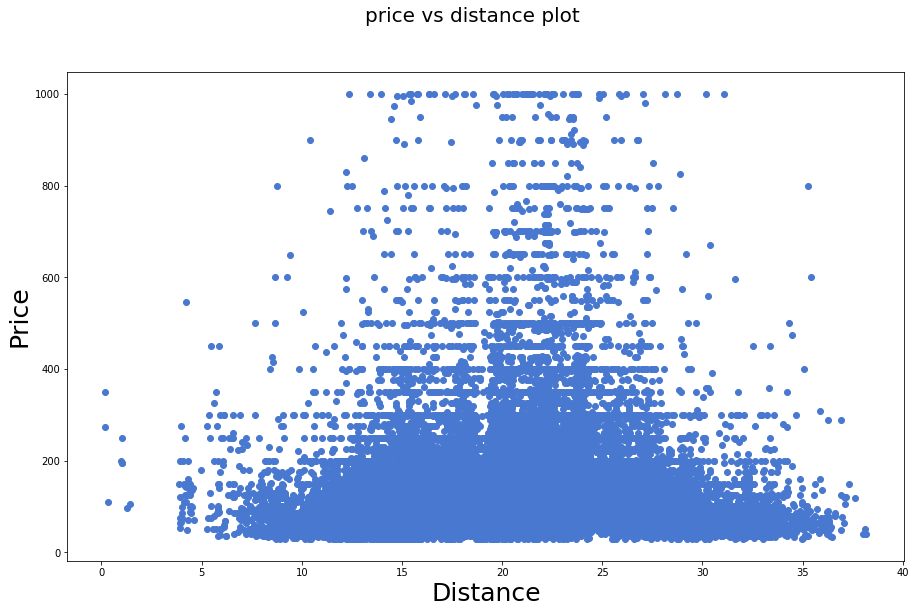

In [134]:
# PLOT with respect to Neponsit as a new centre
# we will do quick plot and check price and df_train_initial['distance_cc']

plt.figure(figsize=(15,9))
plt.scatter(df_train_initial['distance_cc'],df_train_initial['price'])
plt.suptitle('price vs distance plot', fontsize=20)
plt.xlabel('Distance',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.show()


# This is checked and did not give better results, hence the following cells are commented out. We will revert back the distance calculations with the means

In [135]:
df_train_hostid_onehot['lat_ny'] = df_train_hostid_onehot['latitude'].mean()
#df_train_hostid_onehot['lat_ny'] = df_train_hostid_onehot['lat_ny'].astype(float)
df_train_hostid_onehot['long_ny'] = df_train_hostid_onehot['longitude'].mean()
#df_train_hostid_onehot['long_ny'] = df_train_hostid_onehot['long_ny'].astype(float)
df_train_hostid_onehot['distance_cc'] =haversine(np.radians(df_train_hostid_onehot['long_ny']), np.radians(df_train_hostid_onehot['lat_ny']),np.radians(df_train_hostid_onehot['longitude']), np.radians(df_train_hostid_onehot[ 'latitude']) )
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33761 entries, 0 to 34225
Data columns (total 15 columns):
host_id                           33761 non-null int64
neighbourhood_group               33761 non-null object
neighbourhood                     33761 non-null object
latitude                          33761 non-null float64
longitude                         33761 non-null float64
room_type                         33761 non-null object
price                             33761 non-null int64
minimum_nights                    33761 non-null int64
reviews_per_month                 33761 non-null float64
calculated_host_listings_count    33761 non-null int64
availability_365                  33761 non-null int64
years_to_review                   33761 non-null float64
lat_ny                            33761 non-null float64
long_ny                           33761 non-null float64
distance_cc                       33761 non-null float64
dtypes: float64(7), int64(5), object(3)
memory us

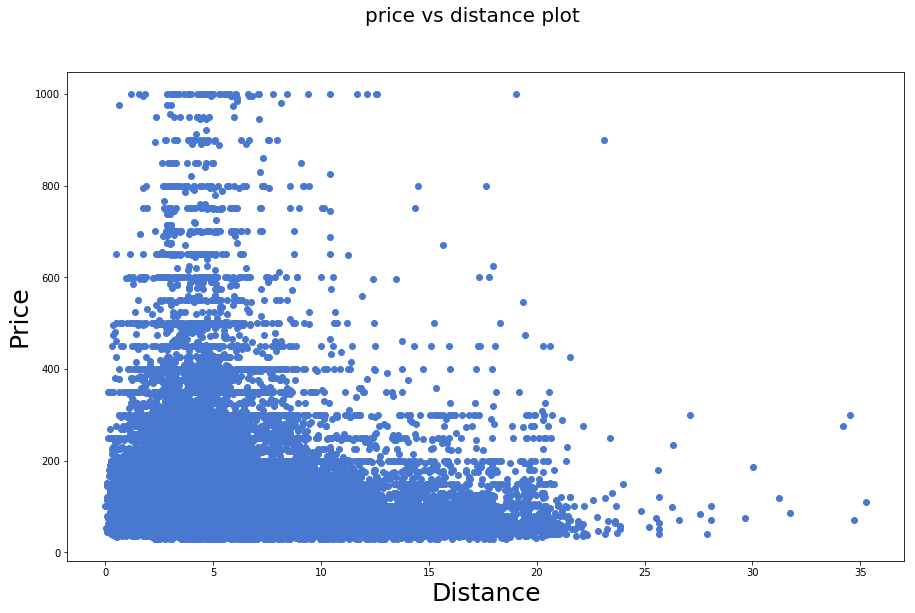

In [136]:

# we will do quick plot and check price and df_train_initial['distance_cc']

plt.figure(figsize=(15,9))
plt.scatter(df_train_hostid_onehot['distance_cc'],df_train_initial['price'])
plt.suptitle('price vs distance plot', fontsize=20)
plt.xlabel('Distance',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.show()



# We are good back again with the distance from avarage lat/long values

#  We will continue the modelling from here

# Here onwards we will do SECONDARY ANALYSYS with all the learning we had
# Drop the features host_id, availibility_365 from the original dataset
# Stick to one-hot-encoding
# Use the distance_cc and drop lat_ny,long_ny,latitude, longitude
# Use cross-validation

In [137]:
#check again
df_train_hostid_onehot.describe()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

In [138]:
# check quick outliers for distance_cc column
outliers_dist = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to
cols = ["distance_cc"]
for column in cols: # Iterating thorough each feature
  #  if column in df_train_initial.select_dtypes(include=np.number).columns: # checking if the feature contains numeric data
            
            # first quartile (Q1)
        q1 = df_train_hostid_onehot[column].quantile(0.001)
        if(column =='distance_cc'):
            low_cutoff_price=q1
            print(low_cutoff_price)            
            # third quartile (Q3)
        q3 = df_train_hostid_onehot[column].quantile(0.99)
        if(column =='distance_cc'):
            high_cutoff_price=q3
            print(high_cutoff_price)
            # IQR
        iqr = q3 - q1
            
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        
        outliers = outliers_dist.append({'Feature':column,'Number of Outliers':df_train_hostid_onehot.loc[(df_train_hostid_onehot[column] < fence_low) | (df_train_hostid_onehot[column] > fence_high)].shape[0]},ignore_index=True)
print(outliers_dist)



0.227327151862
19.0851946452
Empty DataFrame
Columns: [Feature, Number of Outliers]
Index: []


In [139]:
# we observe that the values at 0.1 % correspond to distance of 4.36 but we know many values are above 1, so we will take 1

In [140]:
#df_train_initial.drop(df_train_initial[df_train_initial['minimum_nights'] > 365.0].index, inplace=True )
df_train_hostid_onehot.drop(df_train_hostid_onehot[df_train_hostid_onehot['distance_cc'] < 1.0 ].index,inplace=True )

In [141]:
#check some values
df_train_hostid_onehot.describe()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

In [142]:
df_train_hostid_onehot['distance_cc'].describe()

count    33160.000000
mean         6.207615
std          3.738281
min          1.000144
25%          3.810040
50%          5.125032
75%          7.814043
max         35.270972
Name: distance_cc, dtype: float64

# Drop columns host_id, latitude,longitude,availability_365,lat_ny,long_ny


In [144]:
#df_train_hostid_onehot.drop(['host_id','latitude','longitude','availability_365','lat_ny','long_ny'],axis=1,inplace=True)
#df_train_hostid_onehot.drop(['distance_cc'],axis=1,inplace=True)
df_train_hostid_onehot.drop(['latitude','longitude','lat_ny','long_ny'],axis=1,inplace=True)

In [145]:
df_train_hostid_onehot.head()

,host_id,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbourhood_Olinville,ne

# Lets build model again

In [146]:
# break x,y 
X_v2= df_train_hostid_onehot.drop("price",axis=1).reset_index(drop=True)
Y_v2=df_train_hostid_onehot["price"].reset_index(drop=True)


In [147]:
X_v2.head()


,host_id,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbourhood_Olinville,neighbou

In [148]:
Y_v2.head()

0    120
1    200
2     30
3    115
4    225
Name: price, dtype: int64

In [149]:
#create linear regression model
lin_reg_v2 = LinearRegression()
#perform the test,train split within the training data
X_v2_train, X_v2_test, Y_v2_train, Y_v2_test = train_test_split(X_v2, Y_v2, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg_v2.fit(X_v2_train, Y_v2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
#predict Y
Y_v2_predict=lin_reg_v2.predict(X_v2_test)
df_predicted_v2=pd.DataFrame(
                            {'Actual':  np.round(Y_v2_test,0),
                            'Predicted':np.round(Y_v2_predict,0) }
                            ).reset_index(drop=True)

In [151]:
df_predicted_v2.head(50)


,Actual,Predicted
0,50,65.0
1,180,213.0
2,150,93.0
3,229,266.0
4,309,382.0
5,90,164.0
6,59,144.0
7,60,150.0
8,275,276.0
9,350,204.0


In [152]:
df_predicted_v2.describe()

,Actual,Predicted
count,9948.000000,9948.000000
mean,143.418778,142.424407
std,122.066148,71.136153
min,30.000000,-133.000000
25%,69.000000,81.000000
50%,105.000000,141.000000
75%,175.000000,195.000000
max,1000.000000,398.000000


In [153]:
#Find RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
print('RMSE %.2f'%sqrt(mean_squared_error(Y_v2_test,Y_v2_predict)))

RMSE 99.63


# We observe that though the predictions are comparable to previous results the number of -ve values and hence mean,min have gone skewed with this approach and hence unrealistic RMSE. We will stop this approach here as an excercise to find out how so many negetive values have resulted. We will not be hence including distance_cc in further analysis.


# ANAYISIS 3
# We will not use distance_cc but however use latitude,longitude values only

# By observation we see that the room_type is important parameter and need to    keep all the values in with weightsed order (Shared room,Private room,Entire home/apt


In [154]:
# Start with the copy that had all the basic encodings done
df_train_hostid_onehot_copy.head()


,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbo

In [155]:
# We will try to fit the ridge to be able to modulate features of neibhorhood
#before that we keep one more copy for further analysis
df_train_hostid_onehot_copy_two=df_train_hostid_onehot_copy.copy(deep=True)

# Lets do some Ridge Analysis

In [158]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
#reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

In [159]:
X= df_train_hostid_onehot_copy.drop("price",axis=1)
Y=df_train_hostid_onehot_copy["price"]

X.describe()


,host_id,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,years_to_review,room_type_Private room,room_type_Shared room,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbourhood_Oakwood,neighbourhood

In [162]:
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
reg.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [163]:
#predict Y
Y_predict=reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [164]:
df_predicted.describe()

,Actual,Predicted
count,10129.000000,10129.000000
mean,142.911837,141.465495
std,120.202427,69.454383
min,30.000000,-164.000000
25%,69.000000,81.000000
50%,105.000000,141.000000
75%,175.000000,193.000000
max,1000.000000,400.000000


In [166]:
df_predicted.head(25)

,Actual,Predicted
0,60,109.0
1,130,135.0
2,230,95.0
3,280,148.0
4,180,186.0
5,70,137.0
6,150,152.0
7,378,219.0
8,120,187.0
9,75,148.0


In [167]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 96.99


In [ ]:
# Try with alpha = 0.3

In [168]:
reg_pt3 = linear_model.Ridge(alpha=.3)


In [169]:
reg_pt3.fit(X_train, Y_train)


Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [170]:
#predict Y
Y_predict=reg_pt3.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [171]:
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 97.01


In [ ]:
# Try with alpha = 0.3

In [172]:
reg_pt7 = linear_model.Ridge(alpha=.7)


In [173]:
reg_pt7.fit(X_train, Y_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [174]:
#predict Y
Y_predict=reg_pt7.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [175]:
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 96.97


# LETS stop Ridge here and continue with RandomForestRegressor

In [ ]:
# Try next thing - again make a copy for next iteration and continue with df_train_hostid_onehot_copy_two
# 

# Start of RandomForestRegressor

In [176]:
reg_rf1=RandomForestRegressor()

In [177]:
reg_rf1.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [178]:
#predict Y
Y_predict=reg_rf1.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [179]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 95.96


In [ ]:
# Hyperparameter tuning for Random forest
reg_rf1=RandomForestRegressor()

In [182]:
# Create 10 folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 

modelonecv1 = RandomForestRegressor()


# Train and evaluate multiple models using kfolds
resultsone1 = cross_val_score(modelonecv1, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))

[-9851.3971238  -9331.65763446 -9031.25340438 -9634.77481153
 -8978.45259518 -8385.90050901 -8650.70365667 -8673.01202148
 -8571.17096663 -9422.28550172]
('Mean:', -9053.060822485952)
('Std:', 466.83681416495426)
('RMSE', 95.14757391802458)


In [ ]:
#untest
#predict Y
Y_predict=reg4.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [ ]:
#untest

In [ ]:
prediction = pd.DataFrame(Y_predict,columns=['y'])
submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission.csv',index=False)

# Scope for further analysis

In [ ]:
# Rework and refine apporach of distances from cite center
# check with log transform of data and the effect of same on the model improvement
# Check with one-hot encoding